<a href="https://colab.research.google.com/github/nicolejoice/MIT-504/blob/main/Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis with ARIMA model**

# **1. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# **2. Load Dataset**

In [2]:
data = pd.read_csv("shampoo_sales.csv")


# **3. Convert month to datetime**

In [3]:
data['Month'] = pd.date_range(start='2000-01-01', periods=len(data), freq='M')
data.set_index('Month', inplace = True)

# **4. Plot the Time Series**

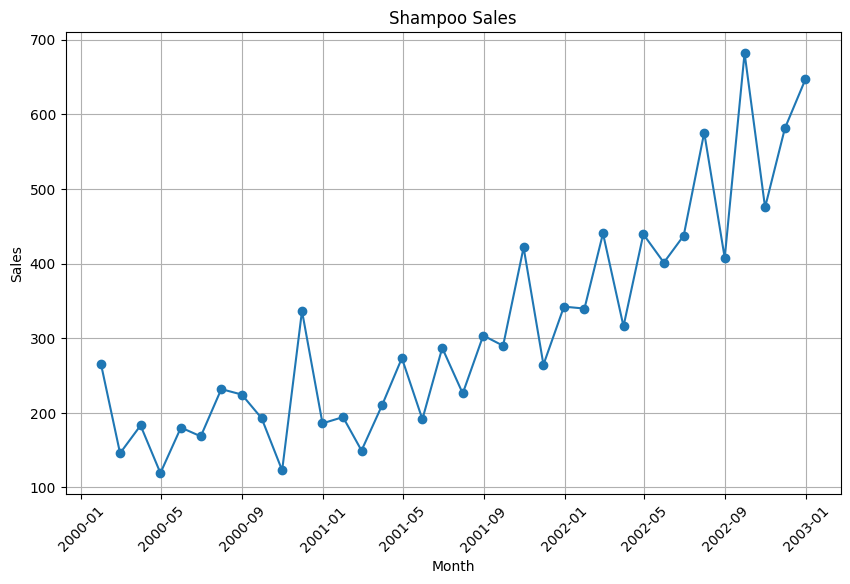

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-')
plt.title('Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **5. Decomposition**

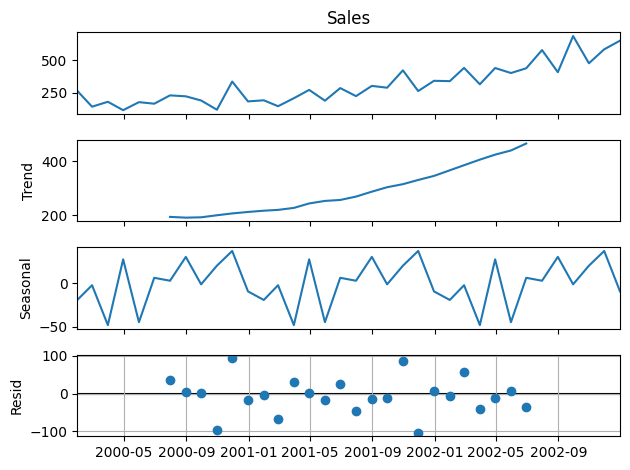

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)

fig = decomposition.plot()
plt.grid(True)
plt.show()

# **6. Fit an ARIMA Model**

In [14]:
from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(data['Sales'], order=(5,1,0))
results =model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sat, 06 Jul 2024   AIC                            408.969
Time:                        02:27:54   BIC                            418.301
Sample:                    01-31-2000   HQIC                           412.191
                         - 12-31-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

# **7. Forecasting Future Values**

<function matplotlib.pyplot.show(close=None, block=None)>

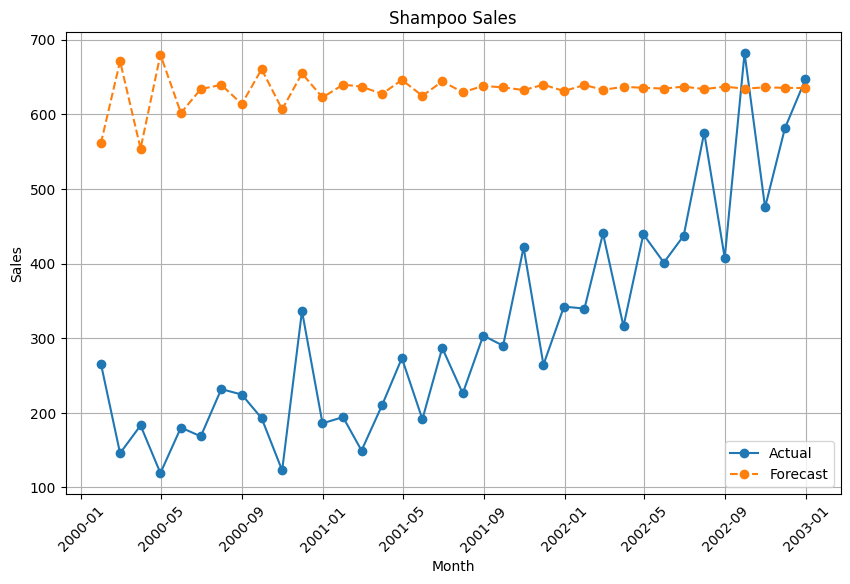

In [17]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Sales'], marker='o', linestyle='-', label='Actual')
plt.plot(data.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show

# **8. Another type of plotting**

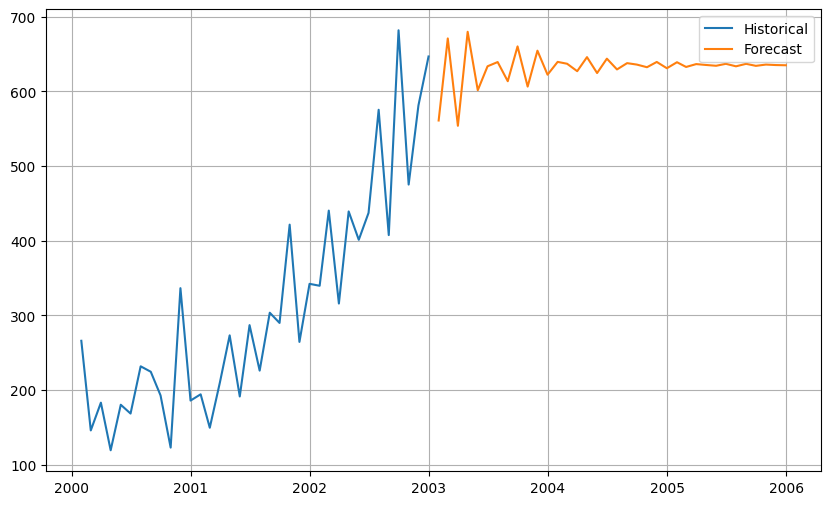

In [19]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10, 6))
plt.plot(data.index,data['Sales'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.grid(True)
plt.show()